In [36]:
%pip install matplotlib missingno nhanes numpy pandas scipy seaborn session_info scikit-learn statsmodels pyjanitor

Note: you may need to restart the kernel to use updated packages.


In [37]:
import janitor  # This should work with the correct package installed
import matplotlib.pyplot as plt
import missingno as msno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets 

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')


In [38]:
%run pandas-missing-extension.ipynb

In [39]:
nhanes_raw_df = nhanes.load.load_NHANES_data(year = '2017-2018').clean_names(case_type = 'snake')
nhanes_raw_df.head()

,general_health_condition,ever_breastfed_or_fed_breastmilk,age_stopped_breastfeedingdays,age_first_fed_formuladays,age_stopped_receiving_formuladays,age_started_other_foodbeverage,age_first_fed_milkdays,type_of_milk_first_fed_whole_milk,type_of_milk_first_fed2_milk,type_of_milk_first_fed1_milk,...,days_smoked_cigs_during_past30_days,avg_cigarettesday_during_past30_days,tried_to_quit_smoking,times_stopped_smoking_cigarettes,how_long_were_you_able_to_stop_smoking,unit_of_measure_dayweekmonthyear_2_smq,current_selfreported_height_inches,current_selfreported_weight_pounds,tried_to_lose_weight_in_past_year,times_lost10_lbs_or_more_to_lose_weight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
columns_to_keep = [
    'total_number_of_people_in_the_family',
    'age_in_years_at_screening',
    'gender',
    'taking_insulin_now',
    'weight_kg',
    'standing_height_cm',
    'blood_mercury_total_ugl',
    'total_monounsaturated_fatty_acids_gm_dr1_tot',
    'systolic_blood_pres3_rd_rdg_mm_hg',
    'carbohydrate_gm_dr2_tot',
    'waist_circumference_cm',
    'general_health_condition'
]

In [41]:
filtered_df = nhanes_raw_df[columns_to_keep]
filtered_df.head()

,total_number_of_people_in_the_family,age_in_years_at_screening,gender,taking_insulin_now,weight_kg,standing_height_cm,blood_mercury_total_ugl,total_monounsaturated_fatty_acids_gm_dr1_tot,systolic_blood_pres3_rd_rdg_mm_hg,carbohydrate_gm_dr2_tot,waist_circumference_cm,general_health_condition
SEQN,,,,,,,,,,,,
93703.0,5,2.0,Female,0.0,13.7,88.6,NaN,NaN,NaN,NaN,48.2,NaN
93704.0,4,2.0,Male,0.0,13.9,94.2,0.47,14.333,NaN,229.69,50.0,NaN
93705.0,1,66.0,Female,0.0,79.5,158.3,1.07,16.432,202.0,147.49,101.8,Good
93706.0,5,18.0,Male,0.0,66.3,175.7,10.64,45.805,108.0,NaN,79.3,Very good
93707.0,7 or more people in the Family,13.0,Male,0.0,45.4,158.4,0.20,33.712,128.0,153.12,64.1,Good


# Resumen básico de nulidad

In [42]:
filtered_df.shape

(8366, 12)

In [43]:
filtered_df.missing.number_complete()

np.int64(90945)

In [44]:
filtered_df.missing.missing_variable_summary()# esta saca los nulos por columna, osea por variable

,variable,n_missing,n_cases,pct_missing
0,total_number_of_people_in_the_family,0,8366,0.000000
1,age_in_years_at_screening,0,8366,0.000000
2,gender,0,8366,0.000000
3,taking_insulin_now,1,8366,0.011953
4,weight_kg,124,8366,1.482190
5,standing_height_cm,350,8366,4.183600
6,blood_mercury_total_ugl,853,8366,10.196032
7,total_monounsaturated_fatty_acids_gm_dr1_tot,1081,8366,12.921348
8,systolic_blood_pres3_rd_rdg_mm_hg,1828,8366,21.850347
9,carbohydrate_gm_dr2_tot,2043,8366,24.420273


In [45]:
#cantidad de registros con respecto a las variables nulas
filtered_df.missing.missing_case_summary()# y esta suma los nulos por fila, osea por caso y te dice cuantos nulos hay por caso. 

,case,n_missing,pct_missing
SEQN,,,
93703.0,93703.0,5,35.714286
93704.0,93704.0,2,14.285714
93705.0,93705.0,0,0.000000
93706.0,93706.0,1,7.142857
93707.0,93707.0,0,0.000000
...,...,...,...
102952.0,102952.0,0,0.000000
102953.0,102953.0,1,7.142857
102954.0,102954.0,0,0.000000


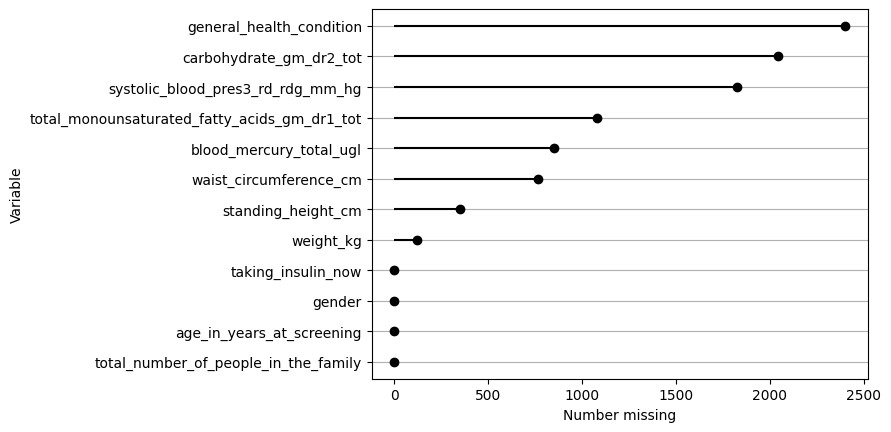

In [46]:
#la relación de variables a partir del impacto (en cantidad) de registros nulos. Por esto, hasta donde llega la bolita 
# que se observa en el gráfico es la cantidad de nulos de la variable. Como se indica en el eje x (Number missing).
filtered_df.missing.missing_variable_plot()

<Axes: >

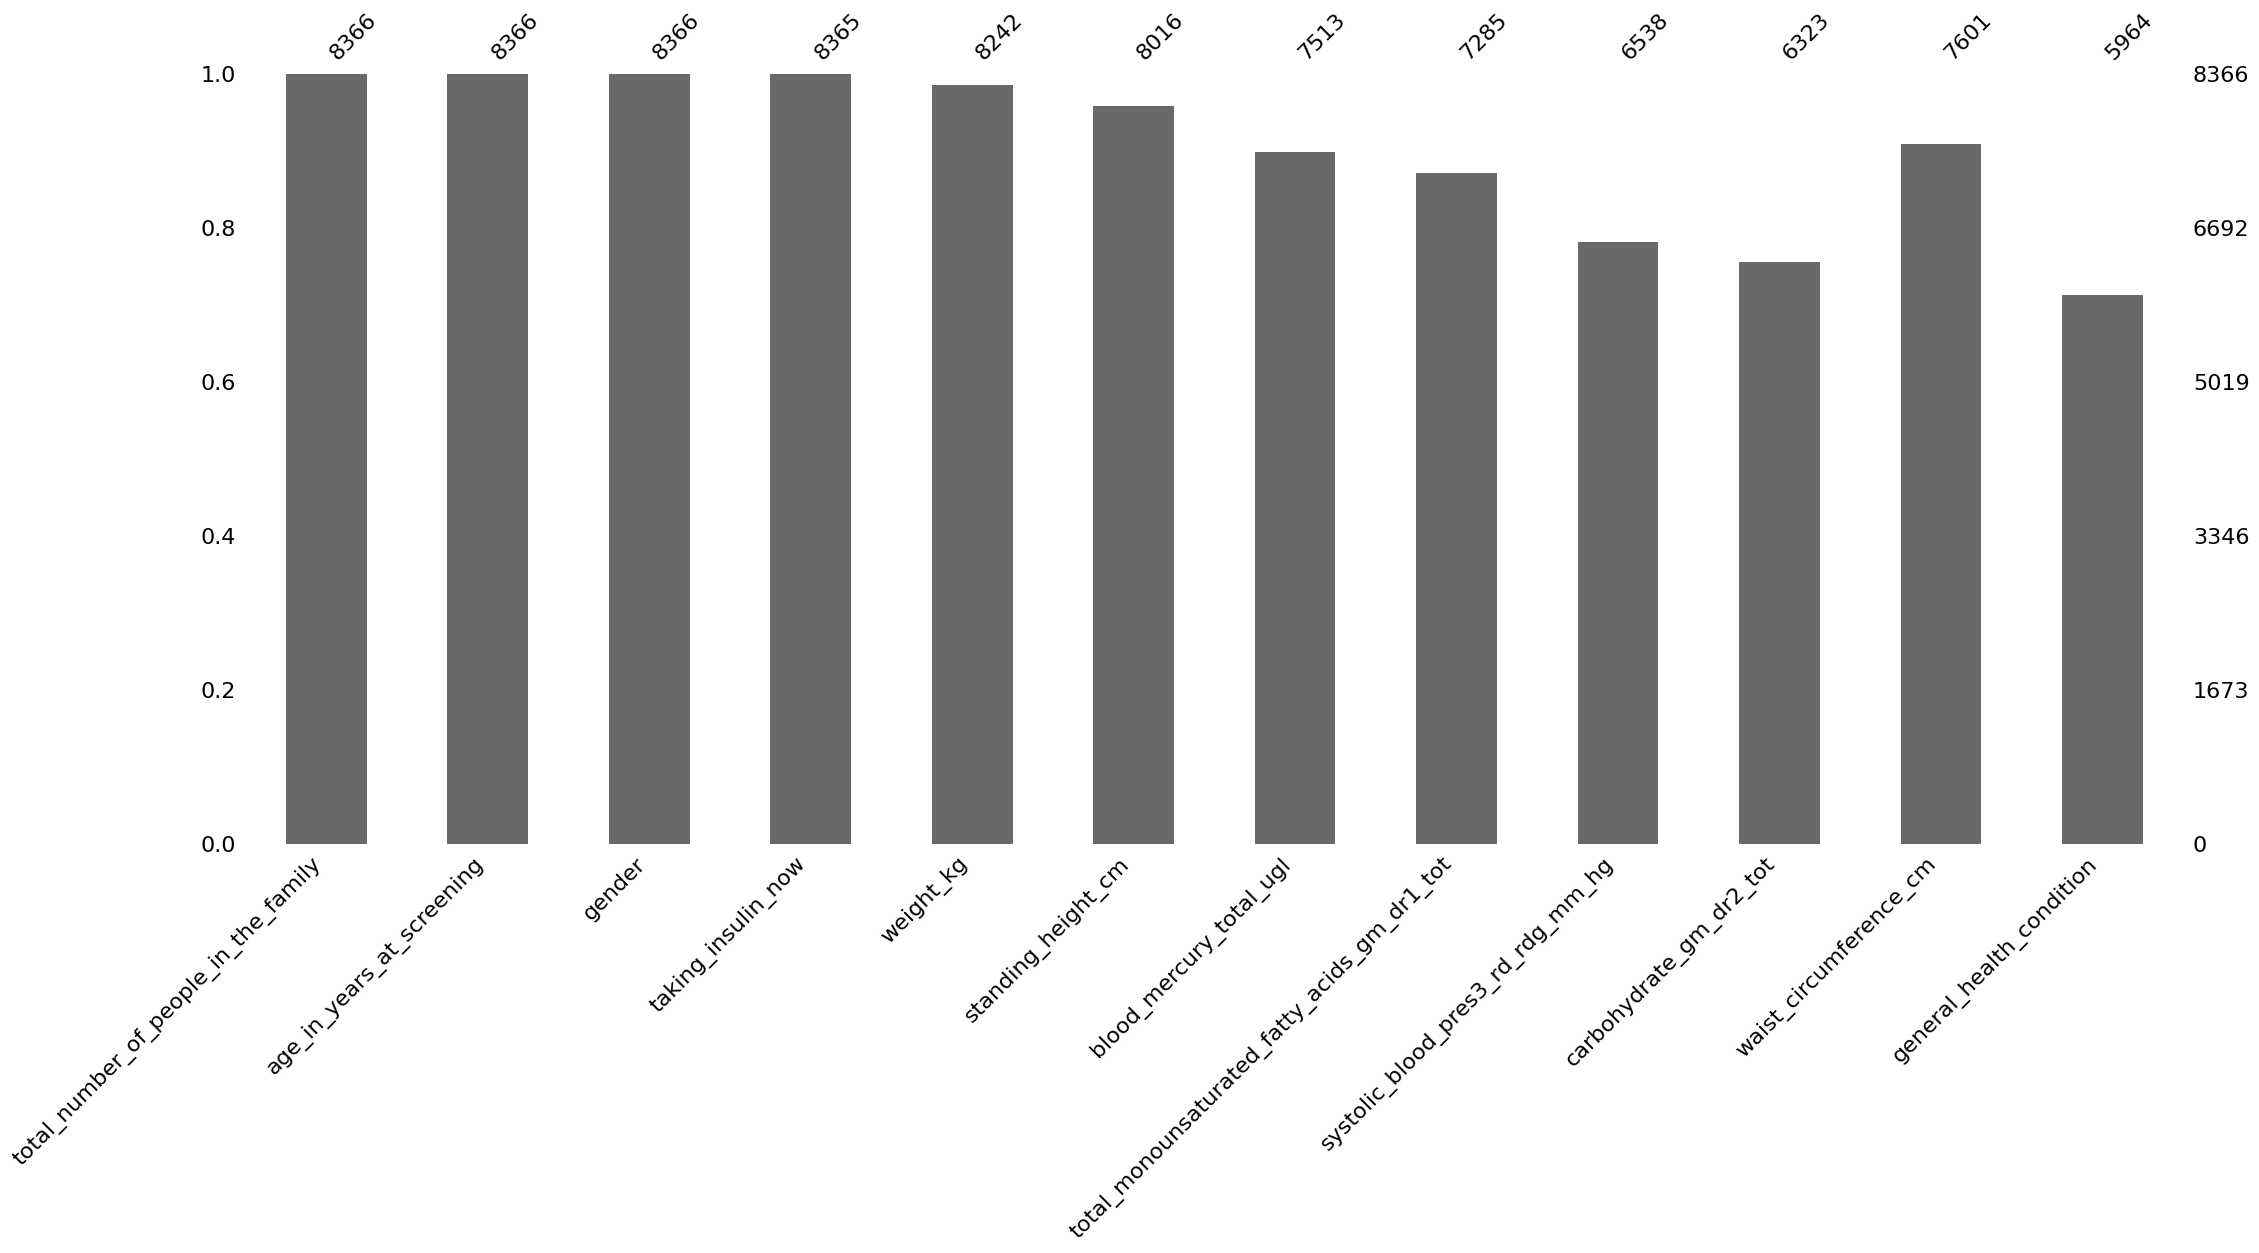

In [47]:
msno.bar(df = filtered_df)
#la parte q le falta de la barra son los datos nulos que tiene esa variable, por eso nos muestra en la parte
#izquierda un 1, que indica la totalidad de los datos (100%) y a la derecha vemos q esta totalidad es de 8366 datos.

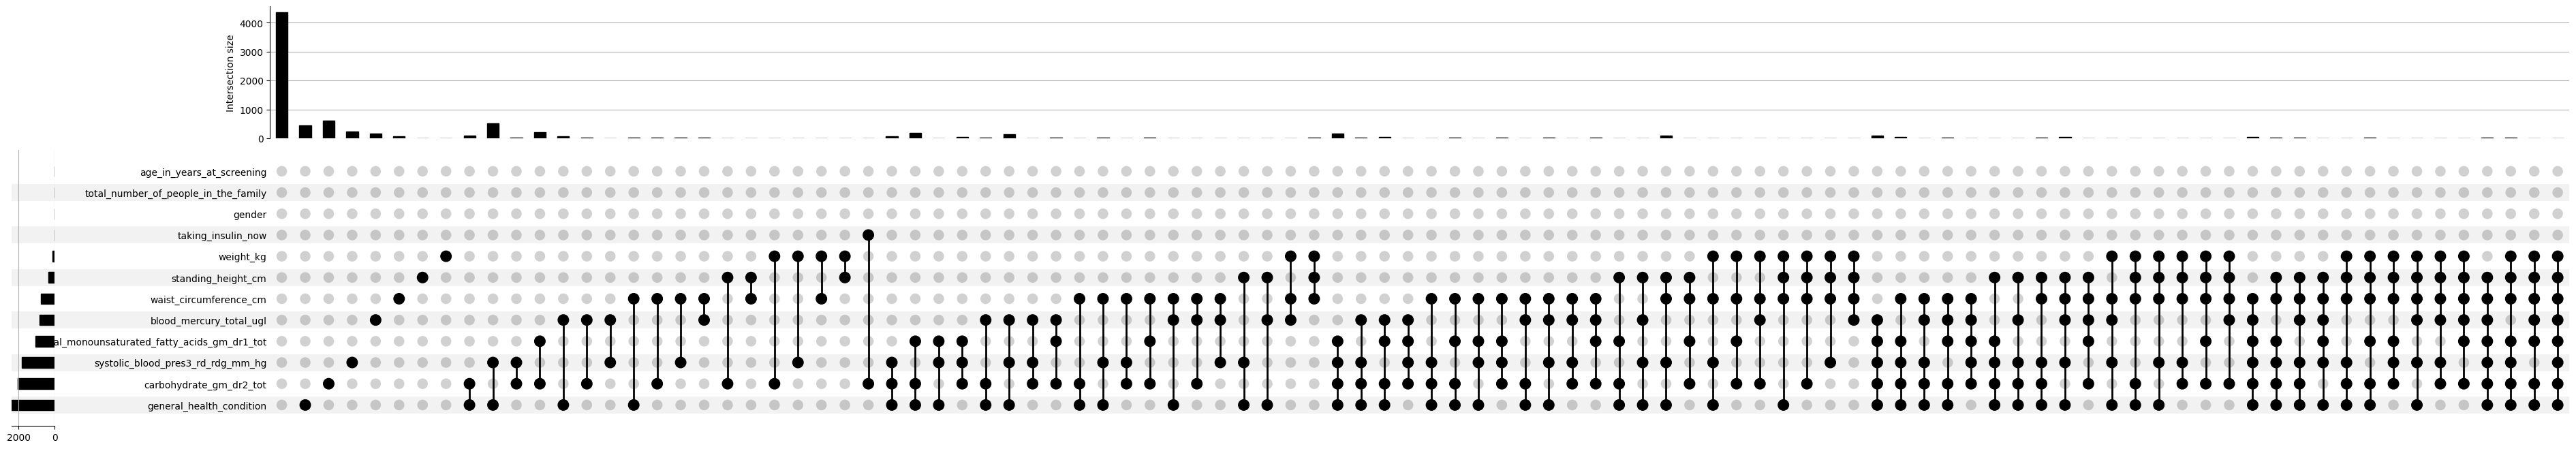

In [48]:
filtered_df.missing.missing_upsetplot(variables=None)
plt.show()
#esta gráfica me esta agrupando por individuos, en la parte superior me dice cuantos individuos tiene cada grupo. En el histograma de la izquierda 
#me dice los nulos tiene cada variable y en la parte inferior derecha me muestra la relación de los nulos por grupo de inidividuos 
#para poder sacar conclusiones de la relación de los nulos entre las variables

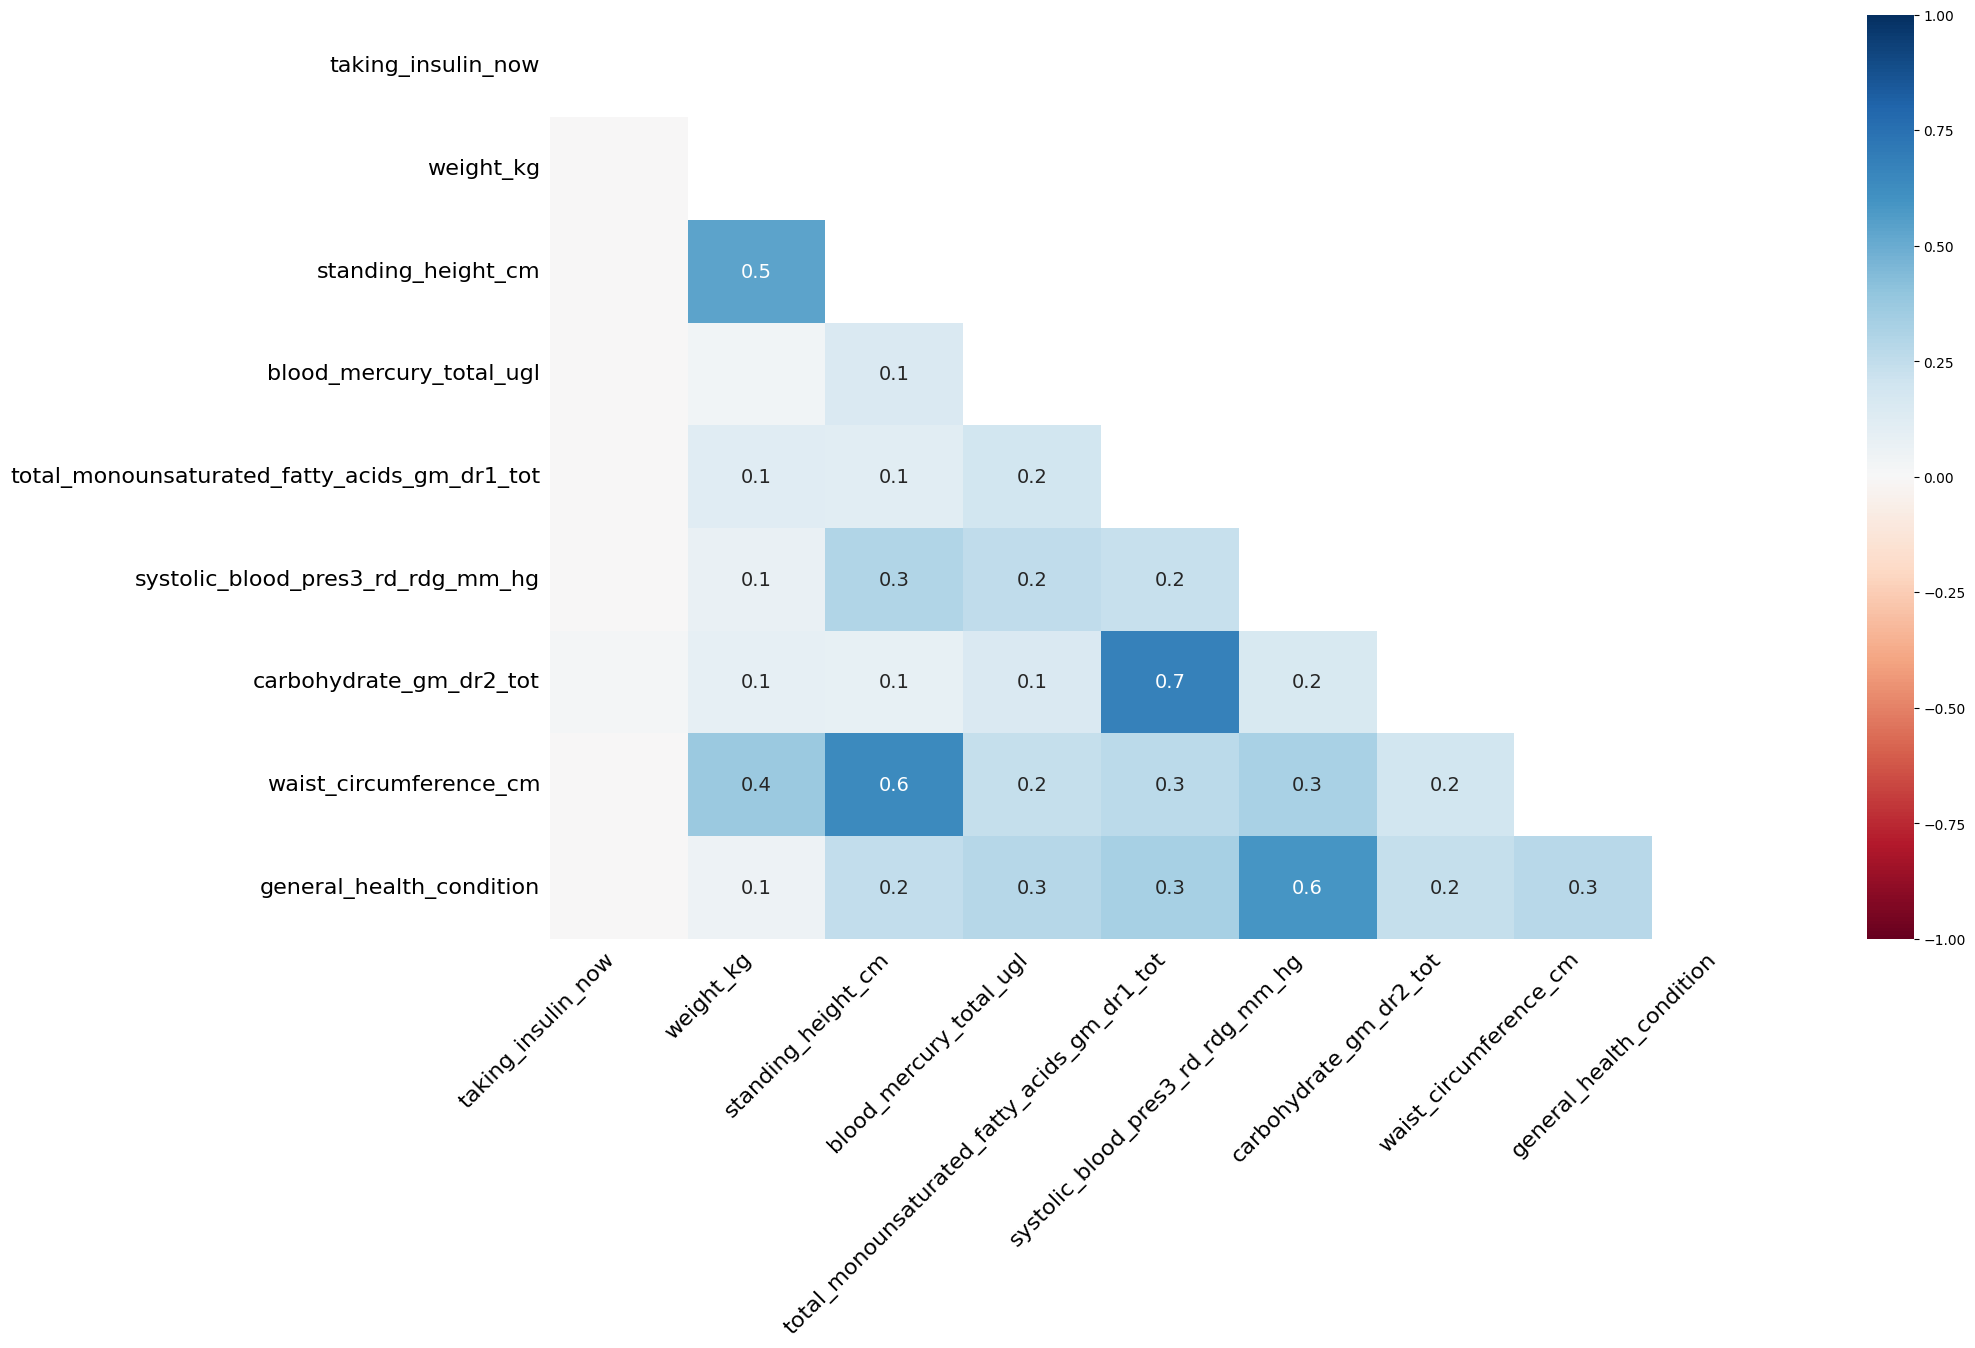

In [49]:
msno.heatmap(filtered_df)
plt.show()
#este mapa de calor me está mostrando la correlación entre las variables nulas, si son nulas al mismo tiempo o no. En este caso solo tenemos
#una correlación moderada en 4 variables. Por lo que se puede decir que en estas variable de correlación moderada, es más probable que 
# los individuos puedan tener variables nulas en ambas varibles al mismo tiempo.
#con respecto a lo anterior se ve que hay una correlacion moderada entre 'carbohydrate' y 'fatty_acids', comprobando la suposicion. 

*MCAR*

In [50]:
filtered_df.missing.sort_variables_by_missingness()

,general_health_condition,carbohydrate_gm_dr2_tot,systolic_blood_pres3_rd_rdg_mm_hg,total_monounsaturated_fatty_acids_gm_dr1_tot,blood_mercury_total_ugl,waist_circumference_cm,standing_height_cm,weight_kg,taking_insulin_now,gender,total_number_of_people_in_the_family,age_in_years_at_screening
SEQN,,,,,,,,,,,,
93703.0,NaN,NaN,NaN,NaN,NaN,48.2,88.6,13.7,0.0,Female,5,2.0
93704.0,NaN,229.69,NaN,14.333,0.47,50.0,94.2,13.9,0.0,Male,4,2.0
93705.0,Good,147.49,202.0,16.432,1.07,101.8,158.3,79.5,0.0,Female,1,66.0
93706.0,Very good,NaN,108.0,45.805,10.64,79.3,175.7,66.3,0.0,Male,5,18.0
93707.0,Good,153.12,128.0,33.712,0.20,64.1,158.4,45.4,0.0,Male,7 or more people in the Family,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,174.17,140.0,15.611,0.65,82.2,156.5,49.0,0.0,Female,2,70.0
102953.0,Fair or,NaN,116.0,44.604,0.62,114.8,164.9,97.4,0.0,Male,1,42.0
102954.0,Good,208.83,114.0,23.098,2.08,86.4,162.6,69.1,0.0,Female,7 or more people in the Family,41.0


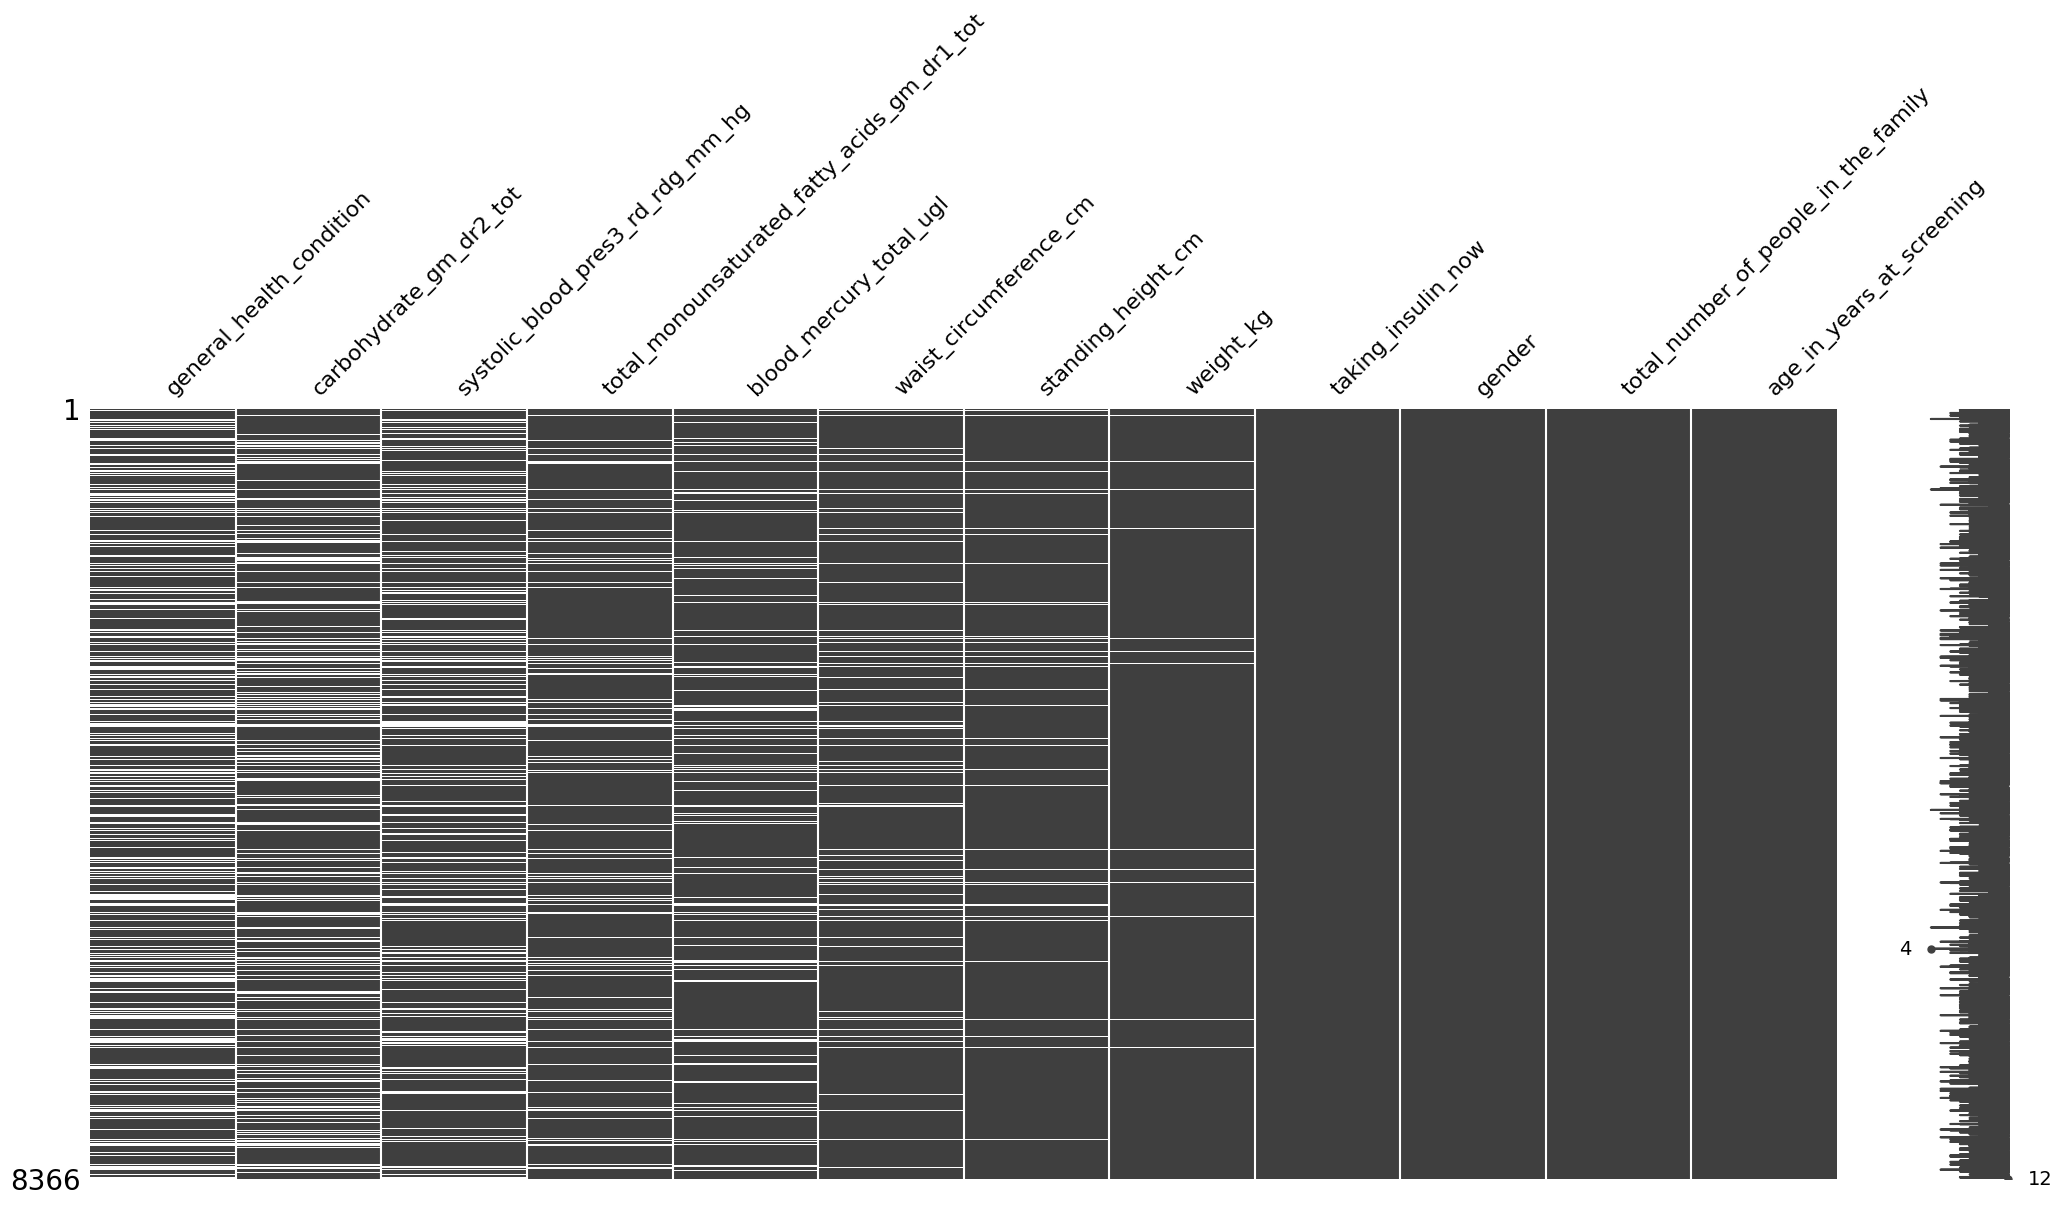

In [51]:
filtered_df.missing.sort_variables_by_missingness().pipe(msno.matrix)
plt.show()
#esta gráfica me muestra basicamente lo que ya se tenía, pero gráficamente muestra de manera más
#  visible la cantidad de nulos por variable

DEFINIENDO EXPLÍCITO O IMPLÍCITO

In [53]:
def summary_of_columns(df):
    summary = pd.DataFrame({
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Zero Count': (df == 0).sum(),
        'NaN Count': df.isna().sum()
    })
    
    summary['Total Count'] = len(df)
    summary['Percent Null'] = (summary['Null Count'] / summary['Total Count']) * 100
    summary['Percent Zero'] = (summary['Zero Count'] / summary['Total Count']) * 100
    summary['Percent NaN'] = (summary['NaN Count'] / summary['Total Count']) * 100
    
    return summary

# Usar la función con tu DataFrame
summary = summary_of_columns(filtered_df)
print(summary)

                                              Non-Null Count  Null Count  \
total_number_of_people_in_the_family                    8366           0   
age_in_years_at_screening                               8366           0   
gender                                                  8366           0   
taking_insulin_now                                      8365           1   
weight_kg                                               8242         124   
standing_height_cm                                      8016         350   
blood_mercury_total_ugl                                 7513         853   
total_monounsaturated_fatty_acids_gm_dr1_tot            7285        1081   
systolic_blood_pres3_rd_rdg_mm_hg                       6538        1828   
carbohydrate_gm_dr2_tot                                 6323        2043   
waist_circumference_cm                                  7601         765   
general_health_condition                                5964        2402   

           

De los datos anteriores y los que vienen a continuación, se puede concluir que todos los datos son nulos explícitos, debido a que son directamente NaN y como tal no hay ceros además de lo que se aprecia en la columna insulin y estos ceros se pueden explicar. 

In [ ]:
filtered_df.standing_height_cm.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

standing_height_cm
161.4    36
165.3    33
163.8    32
168.7    32
160.3    32
         ..
103.2     1
128.9     1
133.1     1
96.8      1
82.5      1
Name: count, Length: 1033, dtype: int64

In [ ]:
filtered_df.general_health_condition.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

general_health_condition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [ ]:
filtered_df.carbohydrate_gm_dr2_tot.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

carbohydrate_gm_dr2_tot
199.92    4
220.55    4
131.18    4
156.77    4
259.37    3
         ..
169.01    1
79.02     1
153.12    1
147.49    1
229.69    1
Name: count, Length: 5935, dtype: int64

In [ ]:
filtered_df.systolic_blood_pres3_rd_rdg_mm_hg.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

systolic_blood_pres3_rd_rdg_mm_hg
116.0    332
106.0    313
104.0    304
108.0    303
114.0    302
        ... 
220.0      1
214.0      1
222.0      1
238.0      1
224.0      1
Name: count, Length: 75, dtype: int64

In [ ]:
filtered_df.total_monounsaturated_fatty_acids_gm_dr1_tot.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

total_monounsaturated_fatty_acids_gm_dr1_tot
5.397605e-79    5
2.323600e+01    3
1.899200e+01    3
1.443700e+01    3
1.869800e+01    3
               ..
6.791300e+01    1
1.748800e+01    1
1.561100e+01    1
2.309800e+01    1
4.824100e+01    1
Name: count, Length: 6933, dtype: int64

In [ ]:
filtered_df.blood_mercury_total_ugl.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

blood_mercury_total_ugl
0.20     1984
0.29      111
0.28      107
0.30      106
0.37       95
         ... 
15.23       1
10.64       1
13.96       1
8.30        1
6.86        1
Name: count, Length: 649, dtype: int64

In [ ]:
filtered_df.waist_circumference_cm.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

waist_circumference_cm
94.0     28
97.0     27
107.2    25
51.0     22
70.0     22
         ..
57.1      1
141.7     1
148.1     1
127.9     1
155.1     1
Name: count, Length: 1035, dtype: int64

In [ ]:
filtered_df.weight_kg.value_counts()
#Esta variable muestra nulos explícitos, ya que sus valores no son muy diferentes o 'raros' como 999

weight_kg
65.1     22
58.7     22
73.3     20
69.4     19
78.7     19
         ..
40.6      1
32.2      1
142.2     1
127.2     1
146.5     1
Name: count, Length: 1354, dtype: int64

In [ ]:
filtered_df.taking_insulin_now.value_counts()
# esta variable solo tiene un nulo, es explícito también

taking_insulin_now
0.0    8118
1.0     247
Name: count, dtype: int64

Preparando los datos para la imputación

In [58]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8366 entries, 93703.0 to 102956.0
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   total_number_of_people_in_the_family          8366 non-null   object 
 1   age_in_years_at_screening                     8366 non-null   float64
 2   gender                                        8366 non-null   object 
 3   taking_insulin_now                            8365 non-null   float64
 4   weight_kg                                     8242 non-null   float64
 5   standing_height_cm                            8016 non-null   float64
 6   blood_mercury_total_ugl                       7513 non-null   float64
 7   total_monounsaturated_fatty_acids_gm_dr1_tot  7285 non-null   float64
 8   systolic_blood_pres3_rd_rdg_mm_hg             6538 non-null   float64
 9   carbohydrate_gm_dr2_tot                       6323 non-nul

In [57]:
filtered_df.describe()

,age_in_years_at_screening,taking_insulin_now,weight_kg,standing_height_cm,blood_mercury_total_ugl,total_monounsaturated_fatty_acids_gm_dr1_tot,systolic_blood_pres3_rd_rdg_mm_hg,carbohydrate_gm_dr2_tot,waist_circumference_cm
count,8366.000000,8365.000000,8242.000000,8016.000000,7513.000000,7.285000e+03,6538.000000,6.323000e+03,7601.000000
mean,35.830026,0.029528,67.499260,156.593401,1.142698,2.746869e+01,121.239217,2.214687e+02,89.928851
std,24.905061,0.169291,31.377152,22.257858,2.269646,1.707667e+01,20.277635,1.135695e+02,22.805093
min,1.000000,0.000000,8.300000,78.300000,0.200000,5.397605e-79,72.000000,5.397605e-79,40.000000
25%,12.000000,0.000000,48.700000,151.400000,0.200000,1.578400e+01,106.000000,1.446800e+02,73.900000
50%,33.000000,0.000000,69.200000,161.900000,0.510000,2.397900e+01,118.000000,2.041900e+02,91.200000
75%,59.000000,0.000000,86.500000,171.200000,1.120000,3.517700e+01,132.000000,2.759900e+02,105.300000
max,80.000000,1.000000,242.600000,197.700000,63.640000,2.000970e+02,238.000000,1.455450e+03,169.500000


In [56]:
filtered_df.describe(include = 'object')

,total_number_of_people_in_the_family,gender,general_health_condition
count,8366,8366,5964
unique,7,2,5
top,4,Female,Good
freq,1658,4272,2454


In [55]:
filtered_df.describe(include='all')

,total_number_of_people_in_the_family,age_in_years_at_screening,gender,taking_insulin_now,weight_kg,standing_height_cm,blood_mercury_total_ugl,total_monounsaturated_fatty_acids_gm_dr1_tot,systolic_blood_pres3_rd_rdg_mm_hg,carbohydrate_gm_dr2_tot,waist_circumference_cm,general_health_condition
count,8366,8366.000000,8366,8365.000000,8242.000000,8016.000000,7513.000000,7.285000e+03,6538.000000,6.323000e+03,7601.000000,5964
unique,7,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,4,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
freq,1658,NaN,4272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2454
mean,NaN,35.830026,NaN,0.029528,67.499260,156.593401,1.142698,2.746869e+01,121.239217,2.214687e+02,89.928851,NaN
std,NaN,24.905061,NaN,0.169291,31.377152,22.257858,2.269646,1.707667e+01,20.277635,1.135695e+02,22.805093,NaN
min,NaN,1.000000,NaN,0.000000,8.300000,78.300000,0.200000,5.397605e-79,72.000000,5.397605e-79,40.000000,NaN
25%,NaN,12.000000,NaN,0.000000,48.700000,151.400000,0.200000,1.578400e+01,106.000000,1.446800e+02,73.900000,NaN
50%,NaN,33.000000,NaN,0.000000,69.200000,161.900000,0.510000,2.397900e+01,118.000000,2.041900e+02,91.200000,NaN
75%,NaN,59.000000,NaN,0.000000,86.500000,171.200000,1.120000,3.517700e+01,132.000000,2.759900e+02,105.300000,NaN


In [54]:
for column in filtered_df.columns:
    unique_values = filtered_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in total_number_of_people_in_the_family: ['5' '4' '1' '7 or more people in the Family' '2' '3' '6']
Unique values in age_in_years_at_screening: [ 2. 66. 18. 13. 75. 56. 67. 54. 71. 61. 22. 45.  1. 60. 64.  5.  9. 70.
 53. 42. 57. 20. 72. 11. 52.  8. 26. 10. 25.  7. 73. 63. 55. 44. 74. 40.
 19. 36. 80.  6.  3. 69. 41. 47. 32. 46. 21. 34. 31. 12. 62. 59. 14. 24.
 16. 58. 68. 38. 48. 35. 50. 28. 29. 43. 76. 37. 30. 27. 15. 39. 49. 33.
 23. 79.  4. 17. 78. 77. 51. 65.]
Unique values in gender: ['Female' 'Male']
Unique values in taking_insulin_now: [ 0.  1. nan]
Unique values in weight_kg: [ 13.7  13.9  79.5 ... 118.2 108.6 129.2]
Unique values in standing_height_cm: [ 88.6  94.2 158.3 ... 133.1  96.8  82.5]
Unique values in blood_mercury_total_ugl: [  nan  0.47  1.07 10.64  0.2  15.23  0.41  0.53  1.24  2.13  4.41  0.36
  2.28  0.29  0.73  0.48  1.5   0.44  1.51  0.98  2.14  0.5   0.37  5.05
  0.35  0.84  1.53  2.92  1.43  0.57  0.97  1.13  2.84  0.68  0.51  0.7
  0.45  0.77 

Los datos se van a transformar a numéricos en algunas variables, en total_number_of_people_in_the_family se convirtio la entrada de 7 or more people in the Family a solamente 7. En la variable gender se convirtio Female a 0 y Male a 1. Y en general_health_condition se convirtio Poor? a 1, Fair or a 2, Good a 3, Very good a 4 y Excellent a 5. Y el tipo de dato va a ser float64. 

In [60]:
filtered_df['total_number_of_people_in_the_family'] = filtered_df['total_number_of_people_in_the_family'].replace('7 or more people in the Family', 7)
filtered_df['total_number_of_people_in_the_family'] = filtered_df['total_number_of_people_in_the_family'].astype('float64')

filtered_df['gender'] = filtered_df['gender'].replace({'Female': 0, 'Male': 1})
filtered_df['gender'] = filtered_df['gender'].astype('float64')

filtered_df['general_health_condition'] = filtered_df['general_health_condition'].replace({
    'Poor?': 1,
    'Fair or': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
})
filtered_df['general_health_condition'] = filtered_df['general_health_condition'].astype('float64')


In [61]:
for column in filtered_df.columns:
    unique_values = filtered_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in total_number_of_people_in_the_family: [5. 4. 1. 7. 2. 3. 6.]
Unique values in age_in_years_at_screening: [ 2. 66. 18. 13. 75. 56. 67. 54. 71. 61. 22. 45.  1. 60. 64.  5.  9. 70.
 53. 42. 57. 20. 72. 11. 52.  8. 26. 10. 25.  7. 73. 63. 55. 44. 74. 40.
 19. 36. 80.  6.  3. 69. 41. 47. 32. 46. 21. 34. 31. 12. 62. 59. 14. 24.
 16. 58. 68. 38. 48. 35. 50. 28. 29. 43. 76. 37. 30. 27. 15. 39. 49. 33.
 23. 79.  4. 17. 78. 77. 51. 65.]
Unique values in gender: [0. 1.]
Unique values in taking_insulin_now: [ 0.  1. nan]
Unique values in weight_kg: [ 13.7  13.9  79.5 ... 118.2 108.6 129.2]
Unique values in standing_height_cm: [ 88.6  94.2 158.3 ... 133.1  96.8  82.5]
Unique values in blood_mercury_total_ugl: [  nan  0.47  1.07 10.64  0.2  15.23  0.41  0.53  1.24  2.13  4.41  0.36
  2.28  0.29  0.73  0.48  1.5   0.44  1.51  0.98  2.14  0.5   0.37  5.05
  0.35  0.84  1.53  2.92  1.43  0.57  0.97  1.13  2.84  0.68  0.51  0.7
  0.45  0.77  0.66  1.4   0.59  0.56  1.41  1.84  0.61  0.3

# Imputación

In [ ]:
categorical_columns = filtered_df.select_dtypes(include = 'object').columns
categorical_transformer = sklearn.compose.make_column_transformer((sklearn.preprocessing.OrdinalEncoder(),
                                                                   categorical_columns), remainder = 'passthrough')
categorical_transformer

In [ ]:
filtered_transformed_df =  pd.DataFrame(categorical_transformer.fit_transform(filtered_df), 
                                      columns = categorical_transformer.get_feature_names_out(),
                                      index = filtered_df.index).rename_columns(function = lambda x: x.removeprefix('ordinalencoder__')).rename_columns(function = lambda x: x.removeprefix('remainder__'))
filtered_transformed_df

Imputación Simple

In [62]:
filtered_df.describe(include='all')

,total_number_of_people_in_the_family,age_in_years_at_screening,gender,taking_insulin_now,weight_kg,standing_height_cm,blood_mercury_total_ugl,total_monounsaturated_fatty_acids_gm_dr1_tot,systolic_blood_pres3_rd_rdg_mm_hg,carbohydrate_gm_dr2_tot,waist_circumference_cm,general_health_condition
count,8366.000000,8366.000000,8366.000000,8365.000000,8242.000000,8016.000000,7513.000000,7.285000e+03,6538.000000,6.323000e+03,7601.000000,5964.000000
mean,3.576142,35.830026,0.489362,0.029528,67.499260,156.593401,1.142698,2.746869e+01,121.239217,2.214687e+02,89.928851,3.211771
std,1.765479,24.905061,0.499917,0.169291,31.377152,22.257858,2.269646,1.707667e+01,20.277635,1.135695e+02,22.805093,0.970428
min,1.000000,1.000000,0.000000,0.000000,8.300000,78.300000,0.200000,5.397605e-79,72.000000,5.397605e-79,40.000000,1.000000
25%,2.000000,12.000000,0.000000,0.000000,48.700000,151.400000,0.200000,1.578400e+01,106.000000,1.446800e+02,73.900000,3.000000
50%,4.000000,33.000000,0.000000,0.000000,69.200000,161.900000,0.510000,2.397900e+01,118.000000,2.041900e+02,91.200000,3.000000
75%,5.000000,59.000000,1.000000,0.000000,86.500000,171.200000,1.120000,3.517700e+01,132.000000,2.759900e+02,105.300000,4.000000
max,7.000000,80.000000,1.000000,1.000000,242.600000,197.700000,63.640000,2.000970e+02,238.000000,1.455450e+03,169.500000,5.000000


<Axes: xlabel='standing_height_cm', ylabel='weight_kg'>

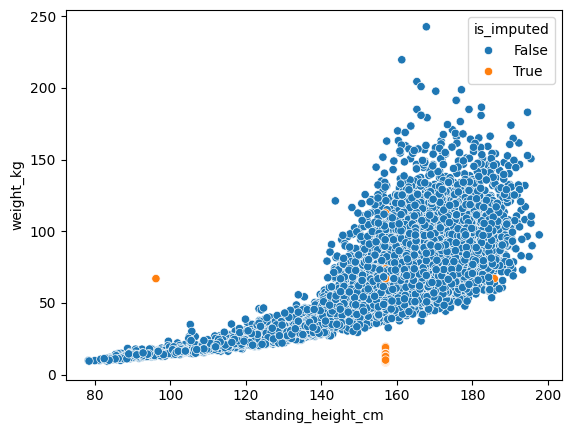

In [67]:
imputador_simple = sklearn.impute.SimpleImputer(strategy='mean')
imputador_simple.fit(filtered_df.select_dtypes(include=['float64']))
filtered_df_impudado = filtered_df.copy()
filtered_df_impudado[filtered_df_impudado.select_dtypes(include=['float64']).columns] = imputador_simple.transform(filtered_df_impudado.select_dtypes(include=['float64']))
redondeo = ['total_number_of_people_in_the_family', 'age_in_years_at_screening', 'gender', 'general_health_condition']
filtered_df_impudado[redondeo] = filtered_df_impudado[redondeo].round()
filtered_df.select_columns('standing_height_cm', 'weight_kg').missing.bind_shadow_matrix(True, False, suffix = '_imp').assign(
    standing_height_cm = lambda df: df.standing_height_cm.fillna(value = df.standing_height_cm.mean().round()),
    weight_kg = lambda df: df.weight_kg.fillna(value = df.weight_kg.mean().round())).missing.scatter_imputation_plot(x = 'standing_height_cm',
                                                                                                            y = 'weight_kg')

Acá se ven muy poquitos datos imputados la verdad y se acomodan muy poco a la tendencia de los datos. Por lo que no creo que sea el mejor desde una perspectiva visual. 

Vecinos cercanos

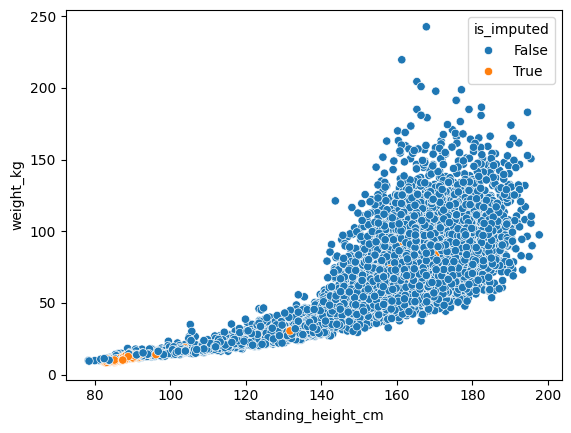

In [66]:
filtered_df_knn_imputado = filtered_df.copy()
columnas_numericas = filtered_df_knn_imputado.select_dtypes(include=['float64']).columns
knn_imputador = sklearn.impute.KNNImputer(n_neighbors=5)
filtered_df_knn_imputado[columnas_numericas] = knn_imputador.fit_transform(filtered_df_knn_imputado[columnas_numericas])
columns_to_round = ['total_number_of_people_in_the_family', 'age_in_years_at_screening', 'gender', 'general_health_condition']
filtered_df_knn_imputado[columns_to_round] = filtered_df_knn_imputado[columns_to_round].round()
filtered_df_knn_imputado.head()

knn_imputer_shadow_matrix = pd.concat([filtered_df_knn_imputado,
                                       filtered_df.missing.create_shadow_matrix(True, False, suffix = '_imp',
                                                                              only_missing = True)], axis=1)
knn_imputer_shadow_matrix.missing.scatter_imputation_plot(x = 'standing_height_cm', y = 'weight_kg')
plt.show()

Acá vemos pocos valores imputados, pero se acomodan un poco mejor al resto de la tendencia. De igual manera, siguen siendo pocos los datos imputados. 

# MICE

Regresion Lineal

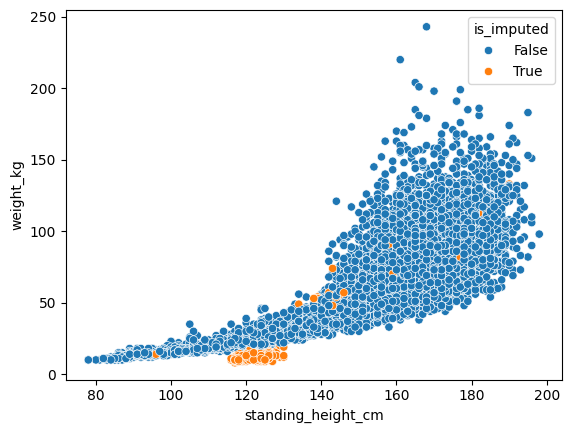

In [71]:
mice_imputer = sklearn.impute.IterativeImputer(estimator=LinearRegression(),
                                initial_strategy='mean',
                                max_iter=10)
nhanes_mice_df_Linear_Regression = pd.DataFrame(mice_imputer.fit_transform(filtered_df).round(),
                              columns=filtered_df.columns,
                              index=filtered_df.index)
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df_Linear_Regression, 
                                        filtered_df.missing.create_shadow_matrix(True, False,
                                                                                     suffix='_imp',
                                                                                     only_missing=True)], axis=1)
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x='standing_height_cm', y='weight_kg')
plt.show()

En esta imputación, se ven muchos más datos que en las anteriores, pero la verdad se ven mucho más alejados del retos de la tendencia de los datos. 

Random Forest

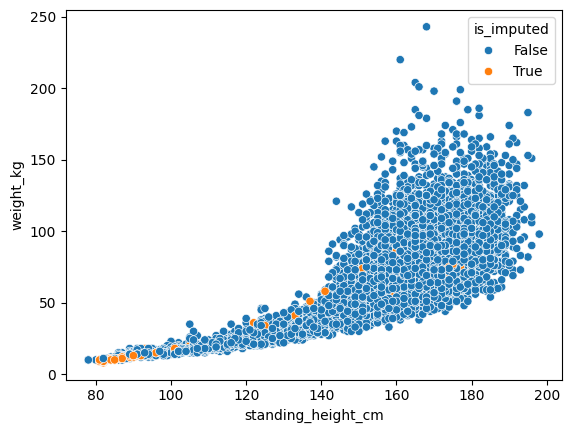

In [72]:
mice_imputer = sklearn.impute.IterativeImputer(estimator=RandomForestRegressor(),
                                initial_strategy='mean',
                                max_iter=10)
nhanes_mice_df_Linear_Regression = pd.DataFrame(mice_imputer.fit_transform(filtered_df).round(),
                              columns=filtered_df.columns,
                              index=filtered_df.index)
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df_Linear_Regression, 
                                        filtered_df.missing.create_shadow_matrix(True, False,
                                                                                     suffix='_imp',
                                                                                     only_missing=True)], axis=1)
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x='standing_height_cm', y='weight_kg')
plt.show()

Acá puede que no se vean tantos datos imputados, pero los que hay se ven mucho en la tendencia del resto de los datos. 

Decision Tree Regressor

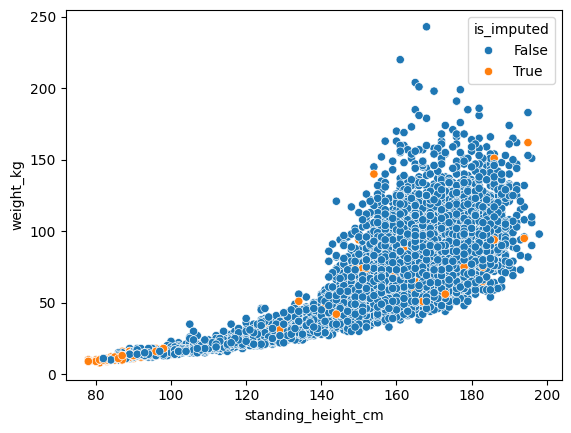

In [75]:
mice_imputer = sklearn.impute.IterativeImputer(estimator=DecisionTreeRegressor(),
                                initial_strategy='mean',
                                max_iter=10)
nhanes_mice_df_Linear_Regression = pd.DataFrame(mice_imputer.fit_transform(filtered_df).round(),
                              columns=filtered_df.columns,
                              index=filtered_df.index)
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df_Linear_Regression, 
                                        filtered_df.missing.create_shadow_matrix(True, False,
                                                                                     suffix='_imp',
                                                                                     only_missing=True)], axis=1)
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x='standing_height_cm', y='weight_kg')
plt.show()

A diferencia del Random Forest, acá se ven los datos un poco más dispersos pero también bien acomodados dentro del resto de los datos. Y también se ve buena cantidad de datos imputados. 

MLPRegressor

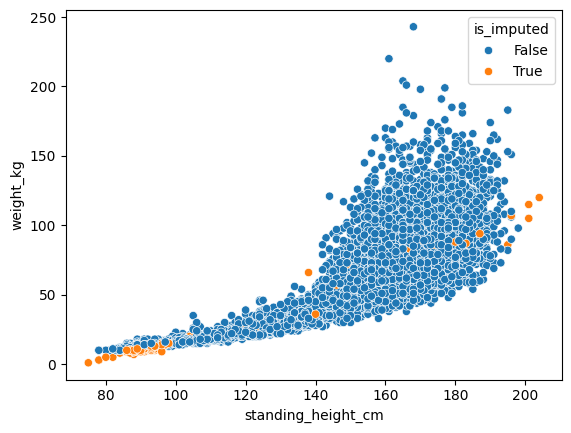

In [74]:
mice_imputer = sklearn.impute.IterativeImputer(estimator=MLPRegressor(),
                                initial_strategy='mean',
                                max_iter=10)
nhanes_mice_df_Linear_Regression = pd.DataFrame(mice_imputer.fit_transform(filtered_df).round(),
                              columns=filtered_df.columns,
                              index=filtered_df.index)
mice_imputer_shadow_matrix = pd.concat([nhanes_mice_df_Linear_Regression, 
                                        filtered_df.missing.create_shadow_matrix(True, False,
                                                                                     suffix='_imp',
                                                                                     only_missing=True)], axis=1)
mice_imputer_shadow_matrix.missing.scatter_imputation_plot(x='standing_height_cm', y='weight_kg')
plt.show()

Este último método muestra muchos datos imputados, algunos más alejados del resto de los datos. Pero muestra una buena tendencia de organización de datos

# Conclusión
Revisando todos los modelos de imputación que utilizamos en clase y en el taller, creo que los metodos DecisionTreeRegressor y MLPRegresssor manejan los datos imputados de mejor manera, respecto al resto de modelos. Por ejemlo el DecisionTreeRegressor, los acomoda más a lo largo de los datos y no solo al principio de la curva, a diferencia de RandomForestRegressor, que la mayoría de los datos imputados se encuentran al principio, aunque este último también acomodaba los datos de nuena manera, pero este método es muy pesado computacionalmente. Los otros métodos que no mencioné acá, no me parecieron que organizaban los datos imputados de manera tan organizada y acorde al resto de métodos. 